In [1]:
import gc
from evaluate import *
from models import get_model
from edl.model import ENN
import torch
from torcheval.metrics import functional as F
import matplotlib.pyplot as plt
from glob import glob
import os

In [3]:
loss_fns = sorted([os.path.basename(path) for path in glob('../outputs/CIFAR10/*')])
all_results = dict()
for loss_fn in loss_fns:
    model = ENN(get_model('CIFAR10'), act='exp', eps=0)
    model.load_state_dict(torch.load(f'../outputs/CIFAR10/{loss_fn}/model.pt'))
    model = model.to(cfg.DEVICE)
    results = evaluate(model, base_dataset_name='CIFAR10', ood_dataset_name='SVHN')
    all_results[loss_fn] = results
    del model; gc.collect(); torch.cuda.empty_cache()

Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\train_32x32.mat
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\test_32x32.mat


283it [00:35,  7.98it/s]


Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\train_32x32.mat
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\test_32x32.mat


283it [00:36,  7.82it/s]


Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\train_32x32.mat
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\test_32x32.mat


283it [00:33,  8.52it/s]


Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\train_32x32.mat
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\test_32x32.mat


283it [00:33,  8.53it/s]


Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\train_32x32.mat
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\test_32x32.mat


283it [00:32,  8.63it/s]


Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\train_32x32.mat
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\test_32x32.mat


283it [00:31,  8.95it/s]


Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\train_32x32.mat
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\test_32x32.mat


283it [00:33,  8.43it/s]


Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\train_32x32.mat
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\test_32x32.mat


283it [00:33,  8.48it/s]


Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\train_32x32.mat
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\test_32x32.mat


283it [00:32,  8.82it/s]


Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\train_32x32.mat
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\test_32x32.mat


283it [00:33,  8.52it/s]


Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\train_32x32.mat
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\test_32x32.mat


283it [00:35,  8.05it/s]


Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\train_32x32.mat
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\test_32x32.mat


283it [00:33,  8.42it/s]


Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\train_32x32.mat
Using downloaded and verified file: C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/classification/datasets/SVHN\test_32x32.mat


283it [00:32,  8.76it/s]


In [5]:
all_results.keys()

dict_keys(['CE', 'EDL-CE', 'EDL-Focal0', 'EDL-Focal1', 'EDL-Focal2', 'EDL-Focal3', 'EDL-Focal4', 'EDL-LpNorm2', 'EDL-LpNorm3', 'EDL-LpNorm4', 'EDL-LpNorm5', 'EDL-NLL', 'EDL-SS'])

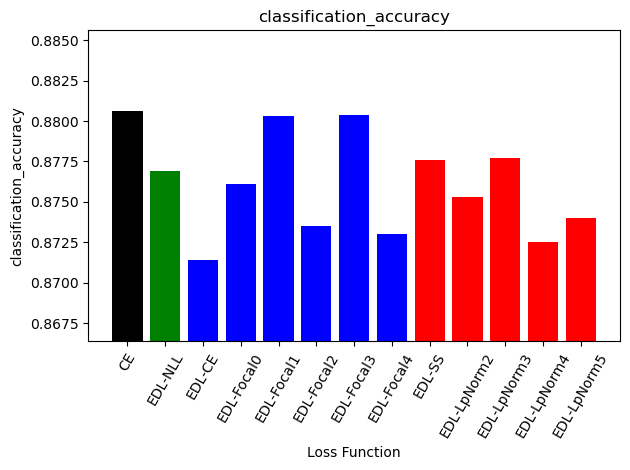

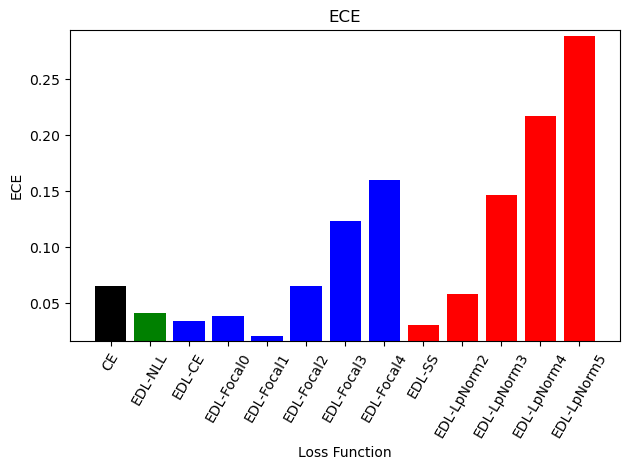

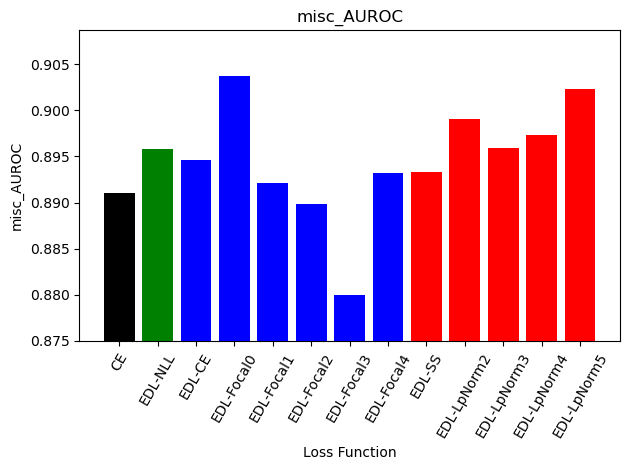

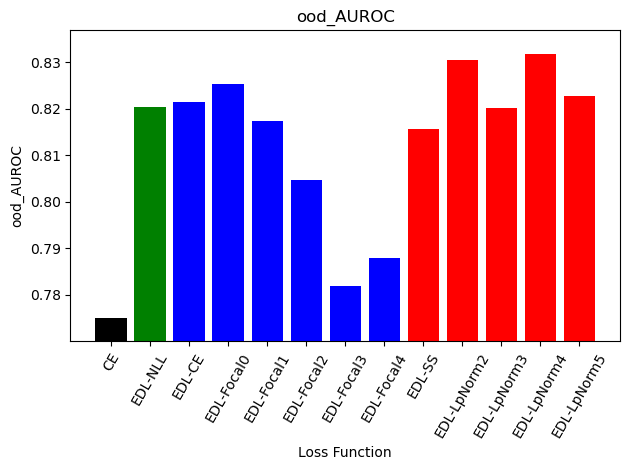

In [18]:
loss_fns = [
    'CE',
    'EDL-NLL', 
    'EDL-CE', 'EDL-Focal0', 'EDL-Focal1', 'EDL-Focal2', 'EDL-Focal3', 'EDL-Focal4',
    'EDL-SS', 'EDL-LpNorm2', 'EDL-LpNorm3', 'EDL-LpNorm4', 'EDL-LpNorm5',
]
for metric in ['classification_accuracy', 'ECE', 'misc_AUROC', 'ood_AUROC']:
    result = [
        (all_results[loss_fn] if metric in ['classification_accuracy', 'ECE'] else all_results[loss_fn]['entropy'])[metric]
        for loss_fn in loss_fns
    ]
    plt.bar(
        range(len(loss_fns)), result,
        color=['black', 'green'] + ['blue']*6 + ['red']*5
    )
    plt.ylim((min(result)-0.005, max(result)+0.005))
    plt.xticks(range(len(loss_fns)), loss_fns); plt.xlabel('Loss Function'); plt.ylabel(metric); plt.title(metric)
    plt.xticks(rotation=60)
    plt.tight_layout()
    plt.savefig(f'../figs/{metric}.jpeg', dpi=300)
    plt.show()